In [1]:
import pandas as pd
import numpy as np
import cPickle as pickle
import holoviews as hv
import numpy as np
hv.notebook_extension()

damageoutput = pd.read_pickle('damagecurveoutput.p')


In [2]:
print pd.__version__
damageoutput['samplenumber'] = pd.to_numeric(damageoutput['samplenumber'])
for column in damageoutput:
    print column

0.18.1
damagecurve
itemname
modelname
roomname
roomorigdam
roomtype
samplenumber


In [3]:
test = damageoutput.loc[0].damagecurve

In [5]:
for model in damageoutput.modelname.unique():
    print model
#     roomlevel = damageoutput.roomname.loc[damageoutput.modelname == model].unique()
#     roomlevel = [''.join(i for i in s if not i.isdigit()) for s in roomlevel]
#     seen = set()
#     for room in damageoutput.roomname.loc[damageoutput.modelname == model].unique():
#         roomlevel = ''.join(i for i in room if not i.isdigit())
#         if roomlevel not in seen:
#             print roomlevel
#             seen.add(roomlevel)
#             for item in damageoutput.itemname.loc[(damageoutput.modelname == model) & (damageoutput.roomname==room)].unique():
#                 print item
#     print

House_1423_3_2
House_1485_3_1
House_2047_3_1
House_2198_3_2
House_2652_4_2


In [10]:
#a is the number of fires that grow beyond the room of origin
a=0
for item in damageoutput.itertuples():
    if np.any(item.damagecurve[:,1] > item.roomorigdam):
        a+=1
# print a

#b is the number of fires that would not grow beyond the room of origin in 900 seconds
b=0
for item in damageoutput.itertuples():
    if not np.any(item.damagecurve[:,1] > item.roomorigdam):
        b+=1
# print b

total = float(a+b)
print total
# print a/total #proportion naturally beyond room of origin
# print b/total #proportion naturally confined to room of origin

#c is the number of fires that grow beyond the room of origin in less than or 480 seconds (before the avg. fire department water on fire time)
c = 0
for item in damageoutput.itertuples():
    if np.any(item.damagecurve[item.damagecurve[:,0] <= 480,1] > item.roomorigdam):
        c+=1
# print c

#d is the number of fires that would have grown beyond the room of origin that the fire department could prevent (grew beyond
    #after 480 seconds)
d=0
for item in damageoutput.itertuples():
    if np.any(item.damagecurve[:,1] > item.roomorigdam):
        if not np.any(item.damagecurve[item.damagecurve[:,0] <= 480,1] > item.roomorigdam):
            d+=1
# print d
print "Prop. No intervention fires beyond room: {}".format(a/total)
print "Prop. No intervention fires confined room: {}".format(b/total)
print "Prop. FD intervention fires beyond room: {}".format(c/total)
print "Prop. FD intervention fires confined room: {}".format((b+d)/total)
print "Prop. fires average FD cannot prevent from spreading: {}".format(c/total)
print "Prop. fires average FD can prevent from spreading: {}".format(d/total)


5167.0
Prop. No intervention fires beyond room: 0.538029804529
Prop. No intervention fires confined room: 0.461970195471
Prop. FD intervention fires beyond room: 0.327269208438
Prop. FD intervention fires confined room: 0.672730791562
Prop. fires average FD cannot prevent from spreading: 0.327269208438
Prop. fires average FD can prevent from spreading: 0.210760596091


:Bars   [FDintervene,confined]   (proportion)
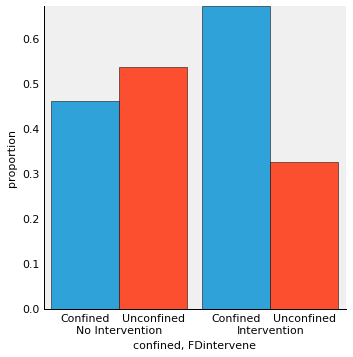

In [6]:
%%opts Bars [padding=0.05, show_legend=False, fig_size=150, show_frame=False]
x = {'proportion':[b/total,a/total,(b+d)/total,c/total],'confined':['Confined','Unconfined','Confined','Unconfined'],'FDintervene':['No Intervention','No Intervention','Intervention','Intervention']}
y = pd.DataFrame(data=x)
proc = hv.Table(y,kdims=['FDintervene','confined'])
proc.to.bars()
#                             ,kdims=['confined','FDintervene']),vdims=['Proportion'])

In [16]:
damagevis = hv.HoloMap(kdims=['modelname','roomname','roomtype','itemname','samplenumber'])
i=0
for item in damageoutput.itertuples():
#     print item.samplenumber
    inputvals = (item.modelname,item.roomname,item.roomtype,item.itemname,item.samplenumber)
    damagevis[inputvals] = hv.Curve(item.damagecurve,extents=(0,0,900,1))*hv.HLine(y=item.roomorigdam)
    i+=1
print i

5167


In [7]:
%%opts HLine (linestyle='dashed')
damagevis['House_2652_4_2','livingroom1','LivingRoom','E1',:].overlay('samplenumber').info

HoloMap containing 1 items of type NdOverlay
--------------------------------------------

Key Dimensions: 
	 modelname: House_2652_4_2...House_2652_4_2 
	 roomname: livingroom1...livingroom1 
	 roomtype: LivingRoom...LivingRoom 
	 itemname: E1...E1 
Deep Dimensions: 
	 samplenumber: 0...27 
	 x: 0.0...900.0 
	 y: 0.0...0.365599796575 



:HoloMap   [modelname]
   :NdOverlay   [roomname]
      :NdOverlay   [roomtype]
         :NdOverlay   [itemname]
            :NdOverlay   [samplenumber]
               :Overlay
                  .Curve.I :Curve   [x]   (y)
                  .HLine.I :HLine   [x,y]
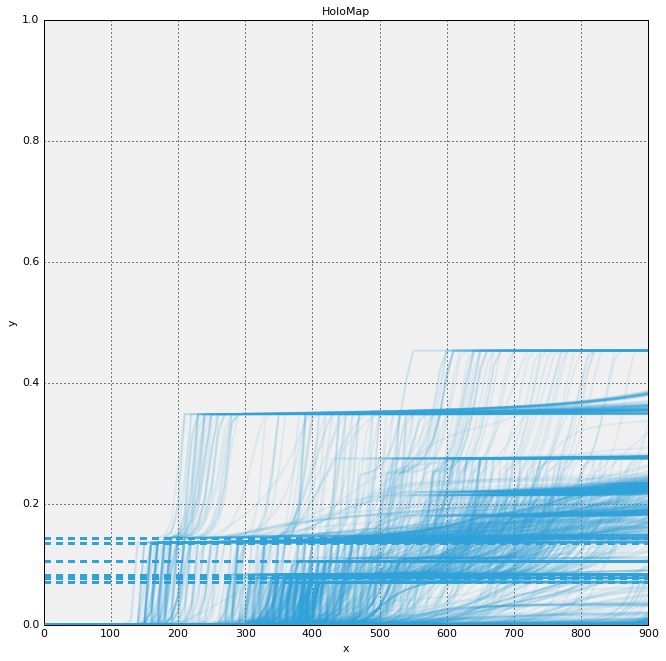

In [17]:
%%output size=300
%%opts HLine (linestyle='dashed') Curve (alpha=0.1)
damagevis['House_1423_3_2','bedrm1','BedroomC','Tw']
test = damagevis['House_1423_3_2','bedrm1','BedroomC',:,:].overlay('samplenumber')
damagevis['House_2652_4_2'].overlay('samplenumber').overlay('itemname').overlay('roomtype').overlay('roomname')


:HoloMap   [modelname,roomname,roomtype,itemname]
   :NdOverlay   [samplenumber]
      :Overlay
         .Curve.I :Curve   [x]   (y)
         .HLine.I :HLine   [x,y]
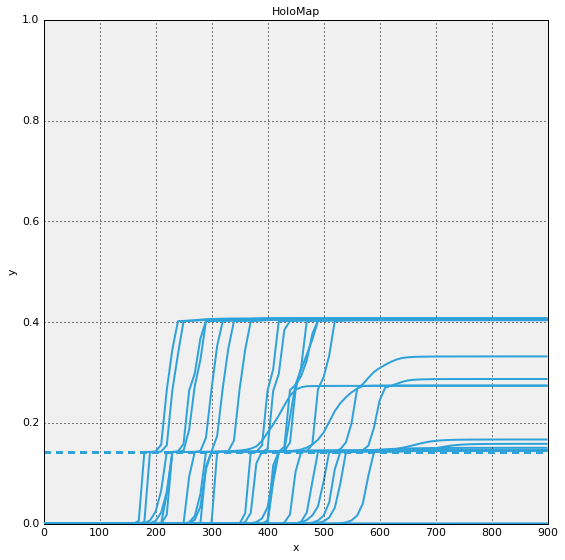

In [18]:
%%output size=250
%%opts HLine (linestyle='dashed') Curve (alpha=1)
# damagevis['House_1423_3_2','livingroom','LivingRoom','E1'].overlay('samplenumber')
# print repr(damagevis['House_1423_3_2','livingroom','LivingRoom','E2'].overlay('samplenumber'))
damagevis['House_1423_3_2','livingroom','LivingRoom','E1',:].overlay('samplenumber')
